In [6]:
import numpy as np
from matplotlib import pyplot as plt

def parse_file(file_name: str):
    lines = open(file_name, "r").readlines()
    lines = list(filter(lambda x: not x.startswith("#"), lines))
    data = list(map(lambda x: x.split(), lines))
    return data

def timestamp(row):
    return int(row[3])

events = parse_file("data/data_muon/useable/vertical.txt")

def calc_counts(events):
    intervals = [[]]
    delta = 10 * 1000 # ms
    int_start = 0
    curr_interval = 0
    n_intervals = None
    i = 0
    while True:
        event = events[i]
        if int_start < timestamp(event) < int_start + delta:
            intervals[-1].append(event)
        elif timestamp(event) > int_start + delta:
            curr_interval += 1
            if n_intervals is not None and curr_interval >= n_intervals:
                break
            intervals.append([])
            int_start += delta
            intervals[-1].append(event)

        i += 1

    counts = np.array(list(map(lambda x:  len(x), intervals)))
    return counts

counts = calc_counts(events)
print(counts)
print(np.std(counts))
print(np.mean(counts))
print(np.sum(counts))

[19 19 25 24 29 22 17 21 23 29 21 27 19 18 24 24 24 25 17 21 22 26 34 15
 23 18 16 25 31 23 18 22 22 25 14 26 28 19 21 14 19 19 21 28 17 30 19 22
 24 19 24 18 20 20 20 18 24 23 27 19 26 21 25 27 11 31 20 23 15 22 13 21
 14 28 22 15 27 22 21 20 28 19 19 22 25 25 19 23 24 16 23 17 22 15 23 23
 27 22 26 15]
4.389943052022429
21.78
2178


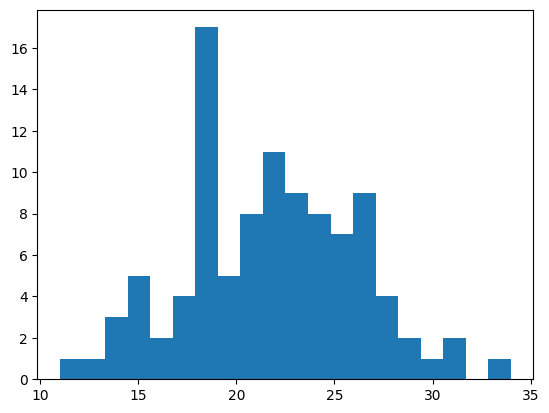

In [7]:
plt.hist(counts, bins=20)
plt.savefig("hist.png")

In [8]:
avg = 0
n = 0
running_avgs = []
for i in range(len(intervals)):
    avg += len(intervals[i])
    n += 1
    running_avgs.append(avg / n)

print(running_avgs)

plt.plot(running_avgs)
plt.savefig("avg.png")

NameError: name 'intervals' is not defined